## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.preprocess import preprocess_data
from src.features import feature_engineering
from src.model import train_model
from src.predict import make_submission

## Load Data

In [2]:
train = pd.read_csv('C:/Users/tarun/OneDrive/Documents/diabetes-prediction-kaggle/data/train.csv').drop(columns = 'id', axis=1)
test = pd.read_csv('C:/Users/tarun/OneDrive/Documents/diabetes-prediction-kaggle/data/test.csv')
test_ids = test["id"]

## EDA

In [3]:
train.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


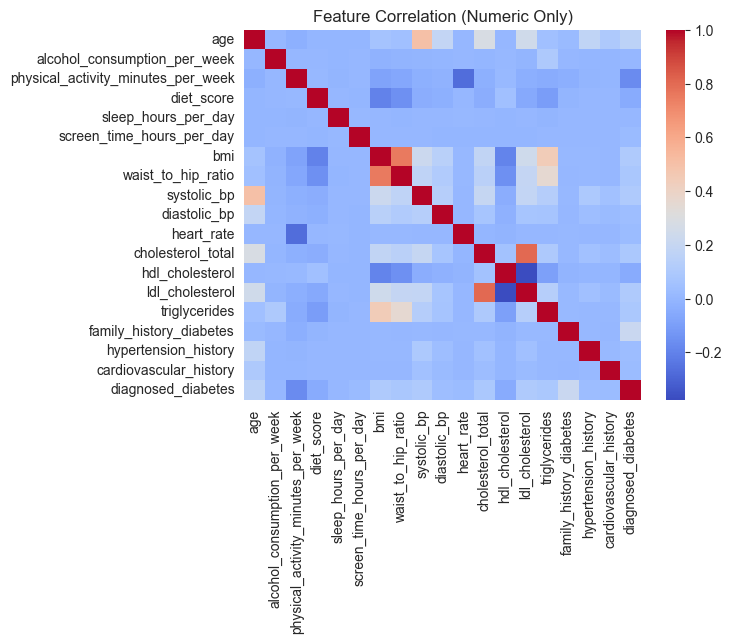

In [5]:
numeric_cols = train.select_dtypes(include=["int64", "float64"])
sns.heatmap(numeric_cols.corr(), cmap="coolwarm")
plt.title("Feature Correlation (Numeric Only)")
plt.show()

## Preprocess

In [6]:
train = preprocess_data(train)
test = preprocess_data(test)

C:\Users\tarun\OneDrive\Documents\diabetes-prediction-kaggle\src\preprocess.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\tarun\OneDrive\Documents\diabetes-prediction-kaggle\src\preprocess.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

## Feature Engineering

In [7]:
train = feature_engineering(train)
test = feature_engineering(test)

## Train/Test Split

In [8]:
X = train.drop(columns=["diagnosed_diabetes"])
y = train["diagnosed_diabetes"]

## Train Model

In [9]:
model, auc = train_model(X, y, test_size=0.15)  # smaller validation split

C:\Users\tarun\Downloads\miniconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:22:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation AUC: 0.7225


## Predict

In [10]:
X_test = test

## Create Submission

In [11]:
preds = model.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    "id": test_ids,
    "diagnosed_diabetes": preds
})

submission.to_csv("../submissions/submission_v2.csv", index=False)
